In [134]:
import numpy as np
from scipy.integrate import quad


################Analytical Solution

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000

# Define Payoff 
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2
    
# Define the integrands for each payoff region
def integrand1(z, S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    g = payoff(z, X1, X2)
    return g * np.exp(-((z - f) ** 2) / (2 * v ** 2 * T))

def integrand2(z, S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    g = payoff(z, X1, X2)
    return g * np.exp(-((z - f) ** 2) / (2 * v ** 2 * T))

def integrand3(z, S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    g = payoff(z, X1, X2)
    return g * np.exp(-((z - f) ** 2) / (2 * v ** 2 * T))

# Calculate the value using numerical quadrature
def numerical_quadrature_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2):
    integral1, _ = quad(integrand1, -10000000, X1, args=(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2))
    integral2, _ = quad(integrand2, X1, X2, args=(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2))
    integral3, _ = quad(integrand3, X2, 10000000, args=(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2))
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    contract_value = np.exp(-r * T) / (v * np.sqrt(2 * np.pi * T)) * (integral1 + integral2 + integral3)
    return contract_value

# Calculate the value using numerical quadrature
contract_value_quad = numerical_quadrature_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2)
print("Value using numerical quadrature:", contract_value_quad)

################Analytical Solution


Value using numerical quadrature: 464.13922682663804


Corrected confidence interval for teh above code in the code below


/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Standard error = 7.119651125474239
Approximate average of later half 464.4242975778255
Execution time for Monte Carlo simulation: 2.2071222919912543


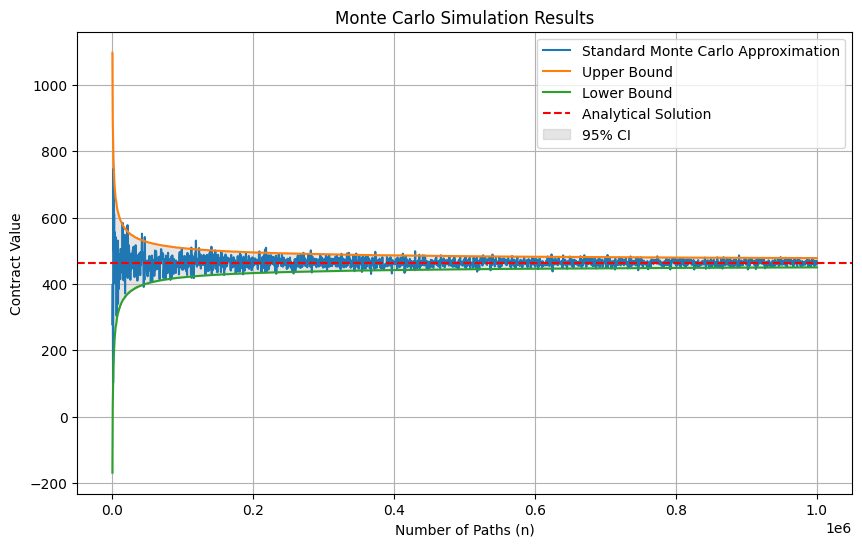

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import timeit

rng = np.random.default_rng(seed=0)

# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation of the financial contract
def monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    contract_value = np.mean(contract_values) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value , contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000


# Number of paths from 0 to 1000000
n_paths = [i for i in range(0, 1000001,500)]



contract_values=[]
l_bound=[]
u_bound=[]
# Iterate through each value of n_paths
for _ in n_paths:
    # Calculate the contract value using Monte Carlo simulation
    contract_value,contract_value_std = monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, _)
    std_error=contract_value_std/np.sqrt(_)
    margin_of_error=1.96*std_error
    upper_bound=contract_value_quad+margin_of_error
    lower_bound=contract_value_quad-margin_of_error

    # Append the contract value to the list
    contract_values.append(contract_value)
    l_bound.append(lower_bound)
    u_bound.append(upper_bound)

print("Standard error =",(u_bound[-1]-contract_value_quad)/1.96)

print("Approximate average of later half", np.mean(contract_values[len(contract_values)//2:]))

def time_monte_carlo():
    return monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[-1])

# Timing the function
execution_time = timeit.timeit(time_monte_carlo, number=1)

print("Execution time for Monte Carlo simulation:", execution_time)

# Create a plot of the contract values
plt.figure(figsize=(10, 6))
plt.plot(n_paths, contract_values, label='Standard Monte Carlo Approximation')
plt.plot(n_paths, u_bound, label='Upper Bound')
plt.plot(n_paths, l_bound, label='Lower Bound')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Contract Value')
plt.title('Monte Carlo Simulation Results')
plt.axhline(y=contract_value_quad, color='red', linestyle='--', label='Analytical Solution')
plt.fill_between(n_paths, l_bound, u_bound, color='gray', alpha=0.2, label='95% CI')
plt.legend()
plt.grid(True)
plt.show()

/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Standard error = 25.171157591158273
Monte carlo at n=80000 438.28967770962475
Execution time for Monte Carlo simulation: 0.18204270799469668


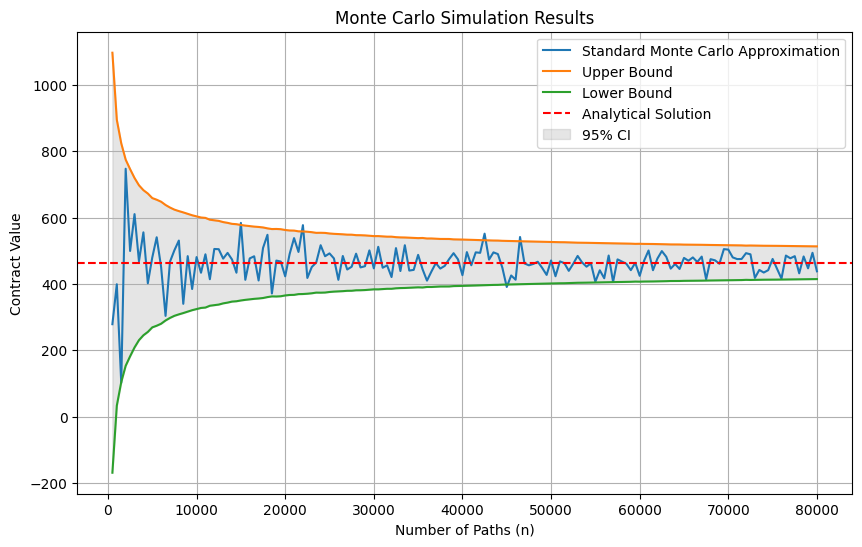

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import timeit

rng = np.random.default_rng(seed=0)

# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation of the financial contract
def monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    contract_value = np.mean(contract_values) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value , contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000


# Number of paths from 0 to 80000
n_paths = [i for i in range(0, 80001,500)]



contract_values=[]
l_bound=[]
u_bound=[]
# Iterate through each value of n_paths
for _ in n_paths:
    # Calculate the contract value using Monte Carlo simulation
    contract_value,contract_value_std = monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, _)
    std_error=contract_value_std/np.sqrt(_)
    margin_of_error=1.96*std_error
    upper_bound=contract_value_quad+margin_of_error
    lower_bound=contract_value_quad-margin_of_error

    # Append the contract value to the list
    contract_values.append(contract_value)
    l_bound.append(lower_bound)
    u_bound.append(upper_bound)

print("Standard error =",(u_bound[-1]-contract_value_quad)/1.96)

print("Monte carlo at n=80000", contract_values[-1])

def time_monte_carlo():
    return monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[-1])

# Timing the function
execution_time = timeit.timeit(time_monte_carlo, number=1)

print("Execution time for Monte Carlo simulation:", execution_time)

# Create a plot of the contract values
plt.figure(figsize=(10, 6))
plt.plot(n_paths, contract_values, label='Standard Monte Carlo Approximation')
plt.plot(n_paths, u_bound, label='Upper Bound')
plt.plot(n_paths, l_bound, label='Lower Bound')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Contract Value')
plt.title('Monte Carlo Simulation Results')
plt.axhline(y=contract_value_quad, color='red', linestyle='--', label='Analytical Solution')
plt.fill_between(n_paths, l_bound, u_bound, color='gray', alpha=0.2, label='95% CI')
plt.legend()
plt.grid(True)
plt.show()

generators={MT19937,PCG64,PCG64DXSM,Philox,SFC64}


In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import timeit

rng = np.random.Generator(np.random.MT19937(seed=0))
#rng=np.random.default_rng(seed=0)

# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation of the financial contract
def monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    contract_value = np.mean(contract_values) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value , contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000

# Number of paths from 5000 to 300000
n_paths = [10000000]

contract_values=[]
l_bound=[]
u_bound=[]
# Iterate through each value of n_paths
for _ in n_paths:
    # Calculate the contract value using Monte Carlo simulation
    contract_value,contract_value_std = monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, _)
    std_error=contract_value_std/np.sqrt(_)
    margin_of_error=1.96*std_error
    upper_bound=contract_value_quad+margin_of_error
    lower_bound=contract_value_quad-margin_of_error

    # Append the contract value to the list
    contract_values.append(contract_value)
    l_bound.append(lower_bound)
    u_bound.append(upper_bound)


print("MC value at 'n'=100000 =", contract_values[0])

def time_monte_carlo():
    return monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[0])

# Timing the function
execution_time = timeit.timeit(time_monte_carlo, number=1)

print("Execution time for Monte Carlo simulation:", execution_time)


MC value at 'n'=100000 = 465.49153107613483
Execution time for Monte Carlo simulation: 22.658700083993608


In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import timeit

rng = np.random.Generator(np.random.PCG64(seed=0))


# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation of the financial contract
def monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    contract_value = np.mean(contract_values) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value , contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000

# Number of paths from 5000 to 300000
n_paths = [10000000]

contract_values=[]
l_bound=[]
u_bound=[]
# Iterate through each value of n_paths
for _ in n_paths:
    # Calculate the contract value using Monte Carlo simulation
    contract_value,contract_value_std = monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, _)
    std_error=contract_value_std/np.sqrt(_)
    margin_of_error=1.96*std_error
    upper_bound=contract_value_quad+margin_of_error
    lower_bound=contract_value_quad-margin_of_error

    # Append the contract value to the list
    contract_values.append(contract_value)
    l_bound.append(lower_bound)
    u_bound.append(upper_bound)

print("MC value at 'n'=100000 =", contract_values[0])

def time_monte_carlo():
    return monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[0])

# Timing the function
execution_time = timeit.timeit(time_monte_carlo, number=1)

print("Execution time for Monte Carlo simulation:", execution_time)


MC value at 'n'=100000 = 462.0789524588697
Execution time for Monte Carlo simulation: 22.29611854199902


In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import time

rng = np.random.Generator(np.random.PCG64DXSM(seed=0))


# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation of the financial contract
def monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    contract_value = np.mean(contract_values) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value , contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000


# Number of paths from 5000 to 300000
n_paths = [10000000]

contract_values=[]
l_bound=[]
u_bound=[]
# Iterate through each value of n_paths
for _ in n_paths:
    # Calculate the contract value using Monte Carlo simulation
    contract_value,contract_value_std = monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, _)
    std_error=contract_value_std/np.sqrt(_)
    margin_of_error=1.96*std_error
    upper_bound=contract_value_quad+margin_of_error
    lower_bound=contract_value_quad-margin_of_error

    # Append the contract value to the list
    contract_values.append(contract_value)
    l_bound.append(lower_bound)
    u_bound.append(upper_bound)


print("MC value at 'n'=100000 =", contract_values[0])

def time_monte_carlo():
    return monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[0])

# Timing the function
execution_time = timeit.timeit(time_monte_carlo, number=1)

print("Execution time for Monte Carlo simulation:", execution_time)


MC value at 'n'=100000 = 463.60240744570194
Execution time for Monte Carlo simulation: 22.63030758399691


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import time

rng = np.random.Generator(np.random.Philox(seed=0))


# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation of the financial contract
def monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    contract_value = np.mean(contract_values) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value , contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000


# Number of paths from 5000 to 300000
n_paths = [10000000]

contract_values=[]
l_bound=[]
u_bound=[]
# Iterate through each value of n_paths
for _ in n_paths:
    # Calculate the contract value using Monte Carlo simulation
    contract_value,contract_value_std = monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, _)
    std_error=contract_value_std/np.sqrt(_)
    margin_of_error=1.96*std_error
    upper_bound=contract_value_quad+margin_of_error
    lower_bound=contract_value_quad-margin_of_error

    # Append the contract value to the list
    contract_values.append(contract_value)
    l_bound.append(lower_bound)
    u_bound.append(upper_bound)

print("MC value at 'n'=100000 =", contract_values[0])

def time_monte_carlo():
    return monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[0])

# Timing the function
execution_time = timeit.timeit(time_monte_carlo, number=1)

print("Execution time for Monte Carlo simulation:", execution_time)


MC value at 'n'=100000 = 464.27518103563204
Execution time for Monte Carlo simulation: 22.92053562500223


In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import time

rng = np.random.Generator(np.random.SFC64(seed=0))


# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation of the financial contract
def monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    contract_value = np.mean(contract_values) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value , contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000


# Number of paths from 5000 to 300000
n_paths = [10000000]

contract_values=[]
l_bound=[]
u_bound=[]
# Iterate through each value of n_paths
for _ in n_paths:
    # Calculate the contract value using Monte Carlo simulation
    contract_value,contract_value_std = monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, _)
    std_error=contract_value_std/np.sqrt(_)
    margin_of_error=1.96*std_error
    upper_bound=contract_value_quad+margin_of_error
    lower_bound=contract_value_quad-margin_of_error

    # Append the contract value to the list
    contract_values.append(contract_value)
    l_bound.append(lower_bound)
    u_bound.append(upper_bound)


print("MC value at 'n'=100000 =", contract_values[0])

def time_monte_carlo():
    return monte_carlo_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[0])

# Timing the function
execution_time = timeit.timeit(time_monte_carlo, number=1)

print("Execution time for Monte Carlo simulation:", execution_time)

MC value at 'n'=100000 = 463.19223015659037
Execution time for Monte Carlo simulation: 22.59443995800393


Antithetic

/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Standard error = 25.192898846306175
Monte Carlo approximation of financial contract value with n=80000: 438.1140079148429
Execution time for Monte Carlo simulation: 0.3603129999974044


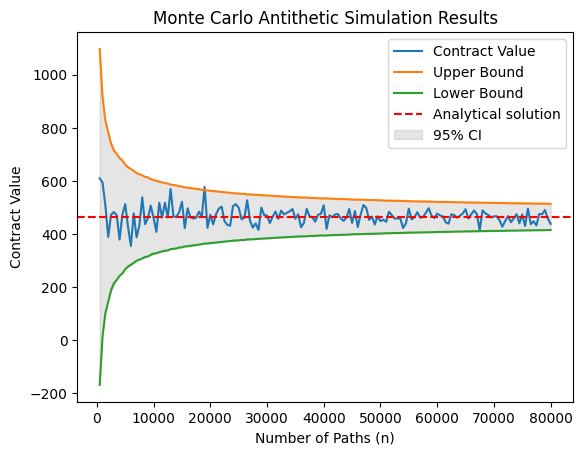

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import timeit

rng = np.random.default_rng(seed=0)

# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation using antithetic variables
def monte_carlo_antithetic(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    contract_values_antithetic = []
    for _ in range(n_paths):
        phi = -rng.normal(0, 1)  # Generate antithetic variable
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values_antithetic.append(payoff_value)
    
    

    contract_values_combined = 0.5 * (np.array(contract_values) + np.array(contract_values_antithetic))
    contract_value = np.mean(contract_values_combined) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value, contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000


# Number of paths from 0 to 80000
n_paths = [i for i in range(0, 80001,500)]


antithetic_contract_values=[]
l_bound_antithetic=[]
u_bound_antithetic=[]
# Iterate through each value of m_paths
for _ in n_paths:
    # Calculate the contract value using Monte Carlo simulation
    contract_value,contract_value_std = monte_carlo_antithetic(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, _)
    std_error=contract_value_std/np.sqrt(_)
    margin_of_error=1.96*std_error
    upper_bound=contract_value_quad+margin_of_error
    lower_bound=contract_value_quad-margin_of_error
    
    # Append the contract value to the list
    antithetic_contract_values.append(contract_value)
    l_bound_antithetic.append(lower_bound)
    u_bound_antithetic.append(upper_bound)
    
print("Standard error =",(u_bound_antithetic[-1]-contract_value_quad)/1.96)
print("Monte Carlo approximation of financial contract value with n=80000:", antithetic_contract_values[-1])

def time_monte_carlo():
    return monte_carlo_antithetic(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[-1])

# Timing the function
execution_time = timeit.timeit(time_monte_carlo, number=1)

print("Execution time for Monte Carlo simulation:", execution_time)


# Create a plot of the contract values
plt.plot(n_paths, antithetic_contract_values, label='Contract Value')
plt.plot(n_paths, u_bound_antithetic, label='Upper Bound')
plt.plot(n_paths, l_bound_antithetic, label='Lower Bound')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Contract Value')
plt.title('Monte Carlo Antithetic Simulation Results')

# Add a red line at the contract value of Analytical solution
plt.axhline(y=contract_value_quad, color='red', linestyle='--', label='Analytical solution')

# Add translucent shading between the upper and lower bounds
plt.fill_between(n_paths, l_bound, u_bound, color='gray', alpha=0.2, label='95% CI')

# Show legend
plt.legend()

# Show plot
plt.show()

Moment matching

Value using numerical quadrature: 464.13922682663804


/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clinton/Library/Python/3.9/lib/python/site-p

Standard error = 0.06294593536115743
Monte Carlo approximation of financial contract value with n=80000: 450.98699491225767
Execution time for Monte Carlo simulation with moment matching: 0.3725710830040043


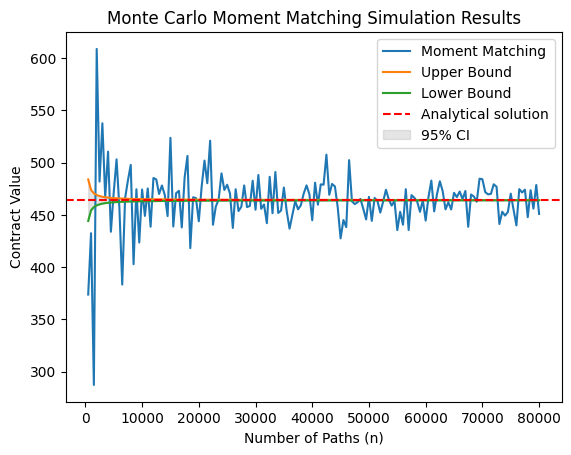

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import timeit

rng = np.random.default_rng(seed=0)

# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation using moment matching
def monte_carlo_moment_matching(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    all_phis = []  # Store all generated phi values
    for _ in range(n_paths):
        phi = rng.normal(0, 1)
        all_phis.append(phi)  # Store phi for moment matching
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    # Calculate mean and variance of all generated phi values
    phi_mean = np.mean(all_phis)
    phi_var = np.var(all_phis)

    # Adjust phi values for moment matching (mean = 0, variance = 1)
    adjusted_phis = [(phi - phi_mean) / np.sqrt(phi_var) for phi in all_phis]

    # Calculate contract values using adjusted phi values
    contract_values_mm = []
    for phi in adjusted_phis:
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values_mm.append(payoff_value)
    
    # Calculate mean and standard deviation of the combined sample
    mean_combined = np.mean(contract_values + contract_values_mm)
    std_combined = np.std(contract_values + contract_values_mm)
    
    # Adjusted contract value using moment matching
    contract_value = mean_combined * np.exp(-r * T)
    contract_value_std = std_combined / np.sqrt(2 * n_paths)
    
    return contract_value, contract_value_std


# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000

# Number of paths from 0 to 80000
n_paths = list(range(0, 80001,500))


# Calculate the value using numerical quadrature
contract_value_quad = numerical_quadrature_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2)
print("Value using numerical quadrature:", contract_value_quad)

# Lists to store contract values and bounds
moment_matching_contract_values = []
l_bound_mm = []
u_bound_mm = []

# Iterate through each value of n_paths
for n in n_paths:
    # Calculate the contract value using Monte Carlo simulation with moment matching
    contract_value, contract_value_std = monte_carlo_moment_matching(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n)
    
    # Calculate confidence intervals
    std_error = contract_value_std / np.sqrt(n)
    margin_of_error = 1.96 * std_error
    upper_bound = contract_value_quad + margin_of_error
    lower_bound = contract_value_quad - margin_of_error
    
    # Append the contract value and bounds to lists
    moment_matching_contract_values.append(contract_value)
    l_bound_mm.append(lower_bound)
    u_bound_mm.append(upper_bound)

print("Standard error =",(u_bound_mm[-1]-contract_value_quad)/1.96)
print("Monte Carlo approximation of financial contract value with n=80000:", moment_matching_contract_values[-1])

# Function to time Monte Carlo simulation
def time_monte_carlo_mm():
    return monte_carlo_moment_matching(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[-1])

# Timing the function
execution_time_mm = timeit.timeit(time_monte_carlo_mm, number=1)
print("Execution time for Monte Carlo simulation with moment matching:", execution_time_mm)

# Create a plot of the contract values
plt.plot(n_paths, moment_matching_contract_values, label='Moment Matching')
plt.plot(n_paths, u_bound_mm, label='Upper Bound')
plt.plot(n_paths, l_bound_mm, label='Lower Bound')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Contract Value')
plt.title('Monte Carlo Moment Matching Simulation Results')

# Add a red line at the contract value of the Analytical solution
plt.axhline(y=contract_value_quad, color='red', linestyle='--', label='Analytical solution')

# Add translucent shading between the upper and lower bounds
plt.fill_between(n_paths, l_bound_mm, u_bound_mm, color='gray', alpha=0.2, label='95% CI')

# Show legend
plt.legend()

# Show plot
plt.show()


Halton

Value using numerical quadrature: 464.13922682663804


/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/clinton/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Standard error = 0.06295577279096697
Monte Carlo Halton approximation of financial contract value with n=80000: 463.2358525510184
Execution time for Monte Carlo simulation with Halton sequence: 0.36899791700125206


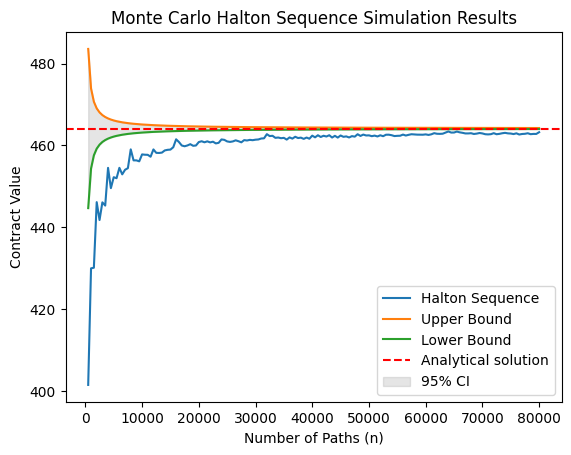

In [189]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import timeit
import numpy as np

# Function to generate Halton sequence
def halton_sequence(n, base):
    sequence = np.zeros(n)
    for i in range(n):
        value = 0
        f = 1 / base
        i_temp = i
        while i_temp > 0:
            value += f * (i_temp % base)
            i_temp = i_temp // base
            f /= base
        sequence[i] = value
    return sequence

# Function to transform Halton sequence into standard normal random numbers
def halton_to_normal(halton_seq):
    return norm.ppf(halton_seq)

# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation using Halton sequence with handling of outliers
def monte_carlo_halton(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    contract_values = []
    all_phis = []  # Store all generated phi values
    halton_base = 2  # Base for Halton sequence
    halton_dimension = 1  # Dimension for Halton sequence
    halton_seq = halton_sequence(n_paths * halton_dimension, halton_base).reshape(n_paths, halton_dimension)
    halton_seq_normal = halton_to_normal(halton_seq)  # Transform to standard normal
    for i in range(n_paths):
        phi = halton_seq_normal[i][0]
        # Handle outliers
        if np.isinf(phi) or np.abs(phi) > 1e5 or np.abs(phi) < 1e-5:
            phi = halton_seq_normal[(i+1) % n_paths][0]  # Use the next number in sequence
        all_phis.append(phi)  # Store phi for moment matching
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)

    # Calculate mean and standard deviation of the combined sample
    mean_halton = np.mean(contract_values)
    std_halton = np.std(contract_values)
    
    # Adjusted contract value using moment matching
    contract_value = mean_halton * np.exp(-r * T)
    contract_value_std = std_halton / np.sqrt(2 * n_paths)
    
    return contract_value, contract_value_std


# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000

# Number of paths from 0 to 80000
n_paths = list(range(0, 80001, 500))

# Calculate the value using numerical quadrature
contract_value_quad = numerical_quadrature_contract(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2)
print("Value using numerical quadrature:", contract_value_quad)

# Lists to store contract values and bounds
halton_contract_values = []
l_bound_halton = []
u_bound_halton = []

# Iterate through each value of n_paths
for n in n_paths:
    # Calculate the contract value using Monte Carlo simulation with Halton sequence
    contract_value, contract_value_std = monte_carlo_halton(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n)
    
    # Calculate confidence intervals
    std_error = contract_value_std / np.sqrt(n)
    margin_of_error = 1.96 * std_error
    upper_bound = contract_value_quad + margin_of_error
    lower_bound = contract_value_quad - margin_of_error
    
    # Append the contract value and bounds to lists
    halton_contract_values.append(contract_value)
    l_bound_halton.append(lower_bound)
    u_bound_halton.append(upper_bound)

print("Standard error =",(u_bound_halton[-1]-contract_value_quad)/1.96)
print("Monte Carlo Halton approximation of financial contract value with n=80000:", halton_contract_values[-1])

# Function to time Monte Carlo simulation
def time_monte_carlo_halton():
    return monte_carlo_halton(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[-1])

# Timing the function
execution_time_halton = timeit.timeit(time_monte_carlo_halton, number=1)
print("Execution time for Monte Carlo simulation with Halton sequence:", execution_time_halton)

# Create a plot of the contract values
plt.plot(n_paths, halton_contract_values, label='Halton Sequence')
plt.plot(n_paths, u_bound_halton, label='Upper Bound')
plt.plot(n_paths, l_bound_halton, label='Lower Bound')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Contract Value')
plt.title('Monte Carlo Halton Sequence Simulation Results')

# Add a red line at the contract value of the Analytical solution
plt.axhline(y=contract_value_quad, color='red', linestyle='--', label='Analytical solution')

# Add translucent shading between the upper and lower bounds
plt.fill_between(n_paths, l_bound_halton, u_bound_halton, color='gray', alpha=0.2, label='95% CI')

# Show legend
plt.legend()

# Show plot
plt.show()

latin hypercube sampling

Standard error = 0.06295577279096697
Monte Carlo approximation of financial contract value with n=80000 (LHS): 464.13938105911495
Execution time for Monte Carlo simulation with Latin Hypercube Sampling: 5.2981163329968695


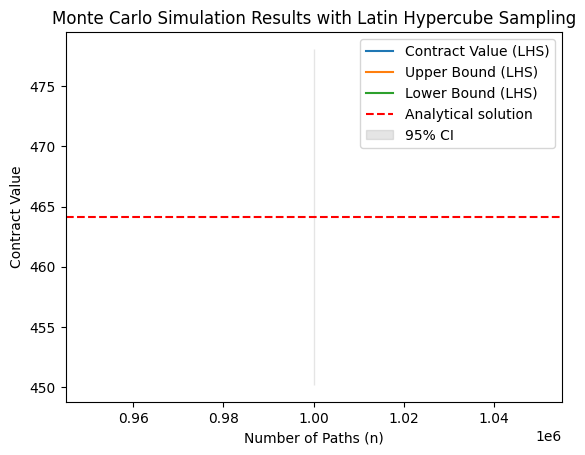

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from scipy.stats import norm
from scipy.stats import qmc

# Function to calculate stock price at maturity
def stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi):
    f = S0 * (alpha * T + np.tan(beta * T)) + theta * np.cos(alpha * T + beta * T)
    v = sigma * ((1 + alpha * T) ** 2) * (S0 ** (3 * gamma)) * (theta ** (-2 * gamma))
    return f + np.sqrt(T) * v * phi

# Function to calculate payoff of the contract
def payoff(ST, X1, X2):
    if ST < X1:
        return ST - X1
    elif X1 <= ST < X2:
        return X2 - ST
    else:
        return ST - X2

# Function for Monte Carlo valuation using Latin Hypercube Sampling (LHS)
def monte_carlo_lhs(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths):
    # Generate Latin Hypercube Samples for standard normal distribution
    phi_samples = qmc.LatinHypercube(1).random(n_paths)
    phi_samples = norm.ppf(phi_samples)
    
    contract_values = []
    for phi in phi_samples:
        ST = stock_price(S0, T, alpha, beta, theta, gamma, sigma, phi)
        payoff_value = payoff(ST, X1, X2)
        contract_values.append(payoff_value)
    
    contract_value = np.mean(contract_values) * np.exp(-r * T)
    contract_value_std = np.std(contract_values)
    return contract_value, contract_value_std

# Parameters
S0 = 5513.2
T = 1.75
r = 0.01
alpha = 0.04
beta = 0.04
theta = 5510
gamma = 1.1
sigma = 0.37
X1 = 5500
X2 = 6000

# Number of paths from 0 to 80000
n_paths = [i for i in range(0, 80001,500)]

# Lists to store contract values and bounds for LHS
lhs_contract_values = []
lhs_l_bound = []
lhs_u_bound = []

# Iterate through each value of n_paths
for n in n_paths:
    # Calculate the contract value using Monte Carlo simulation with Latin Hypercube Sampling
    contract_value_lhs, contract_value_std_lhs = monte_carlo_lhs(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n)
    std_error_lhs = contract_value_std_lhs / np.sqrt(n)
    margin_of_error_lhs = 1.96 * std_error_lhs
    upper_bound_lhs = contract_value_quad + margin_of_error_lhs
    lower_bound_lhs = contract_value_quad - margin_of_error_lhs
    
    # Append the contract value and bounds to lists for LHS
    lhs_contract_values.append(contract_value_lhs)
    lhs_l_bound.append(lower_bound_lhs)
    lhs_u_bound.append(upper_bound_lhs)

print("Standard error =",(u_bound_halton[-1]-contract_value_quad)/1.96)
# Print the Monte Carlo approximation of financial contract value with n=80000 for LHS
print("Monte Carlo approximation of financial contract value with n=80000 (LHS):", lhs_contract_values[-1])

# Timing the LHS function
execution_time_lhs = timeit.timeit(lambda: monte_carlo_lhs(S0, T, r, alpha, beta, theta, gamma, sigma, X1, X2, n_paths[-1]), number=1)
print("Execution time for Monte Carlo simulation with Latin Hypercube Sampling:", execution_time_lhs)

# Create a plot of the contract values for Latin Hypercube Sampling

plt.plot(n_paths, lhs_contract_values, label='Contract Value (LHS)')
plt.plot(n_paths, lhs_u_bound, label='Upper Bound (LHS)')
plt.plot(n_paths, lhs_l_bound, label='Lower Bound (LHS)')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Contract Value')
plt.title('Monte Carlo Simulation Results with Latin Hypercube Sampling')
plt.axhline(y=contract_value_quad, color='red', linestyle='--', label='Analytical solution')
plt.fill_between(n_paths, lhs_l_bound, lhs_u_bound, color='gray', alpha=0.2, label='95% CI')
plt.legend()
plt.show()


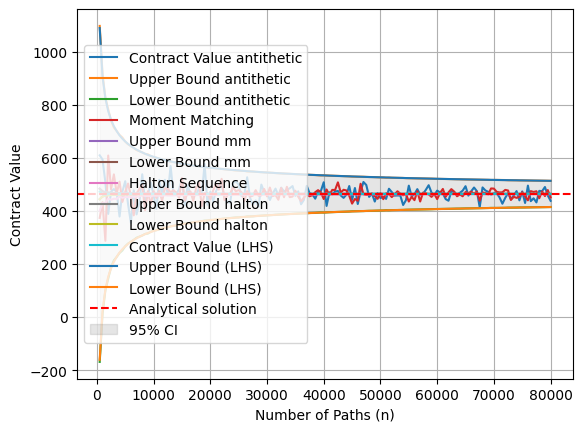

In [158]:
plt.plot(n_paths, antithetic_contract_values, label='Contract Value antithetic')
plt.plot(n_paths, u_bound_antithetic, label='Upper Bound antithetic')
plt.plot(n_paths, l_bound_antithetic, label='Lower Bound antithetic')

plt.plot(n_paths, moment_matching_contract_values, label='Moment Matching')
plt.plot(n_paths, u_bound_mm, label='Upper Bound mm')
plt.plot(n_paths, l_bound_mm, label='Lower Bound mm')

plt.plot(n_paths, halton_contract_values, label='Halton Sequence')
plt.plot(n_paths, u_bound_halton, label='Upper Bound halton')
plt.plot(n_paths, l_bound_halton, label='Lower Bound halton')

plt.plot(n_paths, lhs_contract_values, label='Contract Value (LHS)')
plt.plot(n_paths, lhs_u_bound, label='Upper Bound (LHS)')
plt.plot(n_paths, lhs_l_bound, label='Lower Bound (LHS)')

plt.xlabel('Number of Paths (n)')
plt.ylabel('Contract Value')
plt.axhline(y=contract_value_quad, color='red', linestyle='--', label='Analytical solution')
plt.fill_between(n_paths, lhs_l_bound, lhs_u_bound, color='gray', alpha=0.2, label='95% CI')
plt.legend()
plt.grid(True)
plt.show()

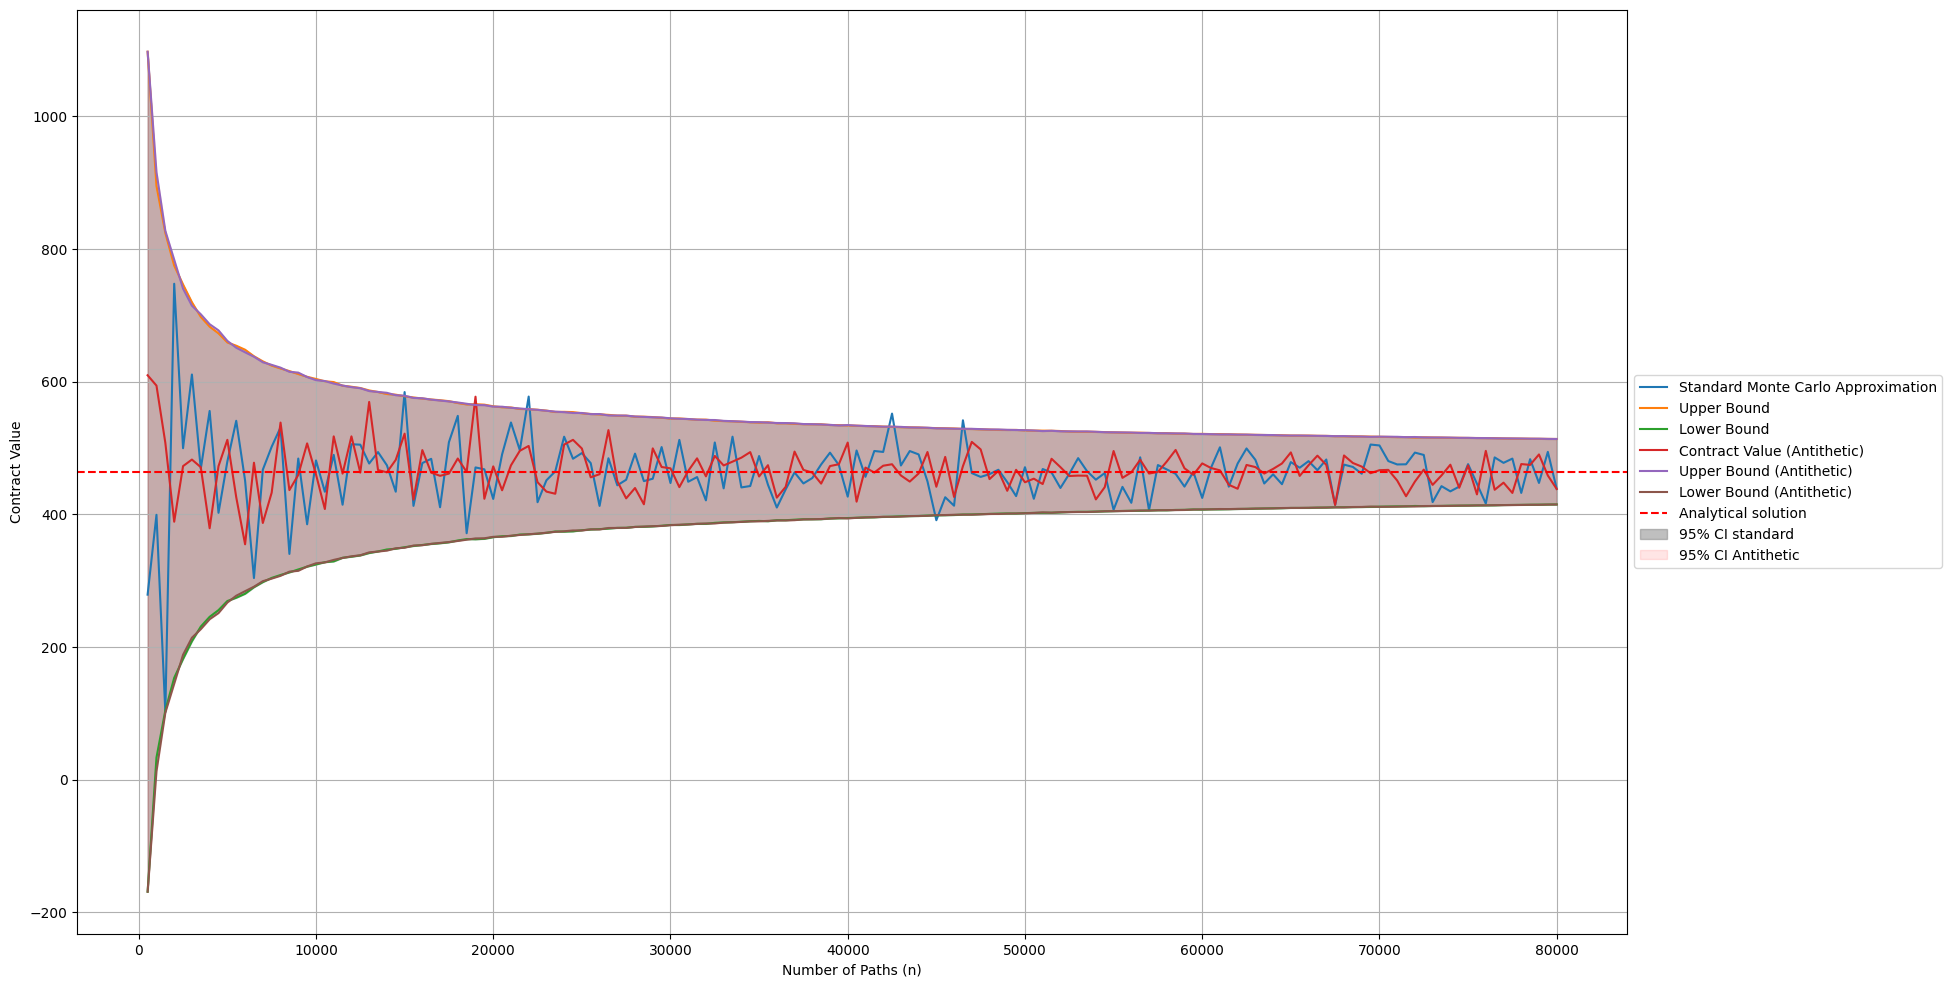

In [177]:


# Plot all contract values
plt.figure(figsize=(20, 12))

# Plot contract values and bounds for each method
plt.plot(n_paths, contract_values, label='Standard Monte Carlo Approximation')
plt.plot(n_paths, u_bound, label='Upper Bound')
plt.plot(n_paths, l_bound, label='Lower Bound')

plt.plot(n_paths, antithetic_contract_values, label='Contract Value (Antithetic)')
plt.plot(n_paths, u_bound_antithetic, label='Upper Bound (Antithetic)')
plt.plot(n_paths, l_bound_antithetic, label='Lower Bound (Antithetic)')


# Set labels and title
plt.xlabel('Number of Paths (n)')
plt.ylabel('Contract Value')
plt.axhline(y=contract_value_quad, color='red', linestyle='--', label='Analytical solution')
plt.fill_between(n_paths, l_bound, u_bound, color='gray', alpha=0.5, label='95% CI standard')
plt.fill_between(n_paths, l_bound_antithetic, u_bound_antithetic, color='red', alpha=0.1, label='95% CI Antithetic')




# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


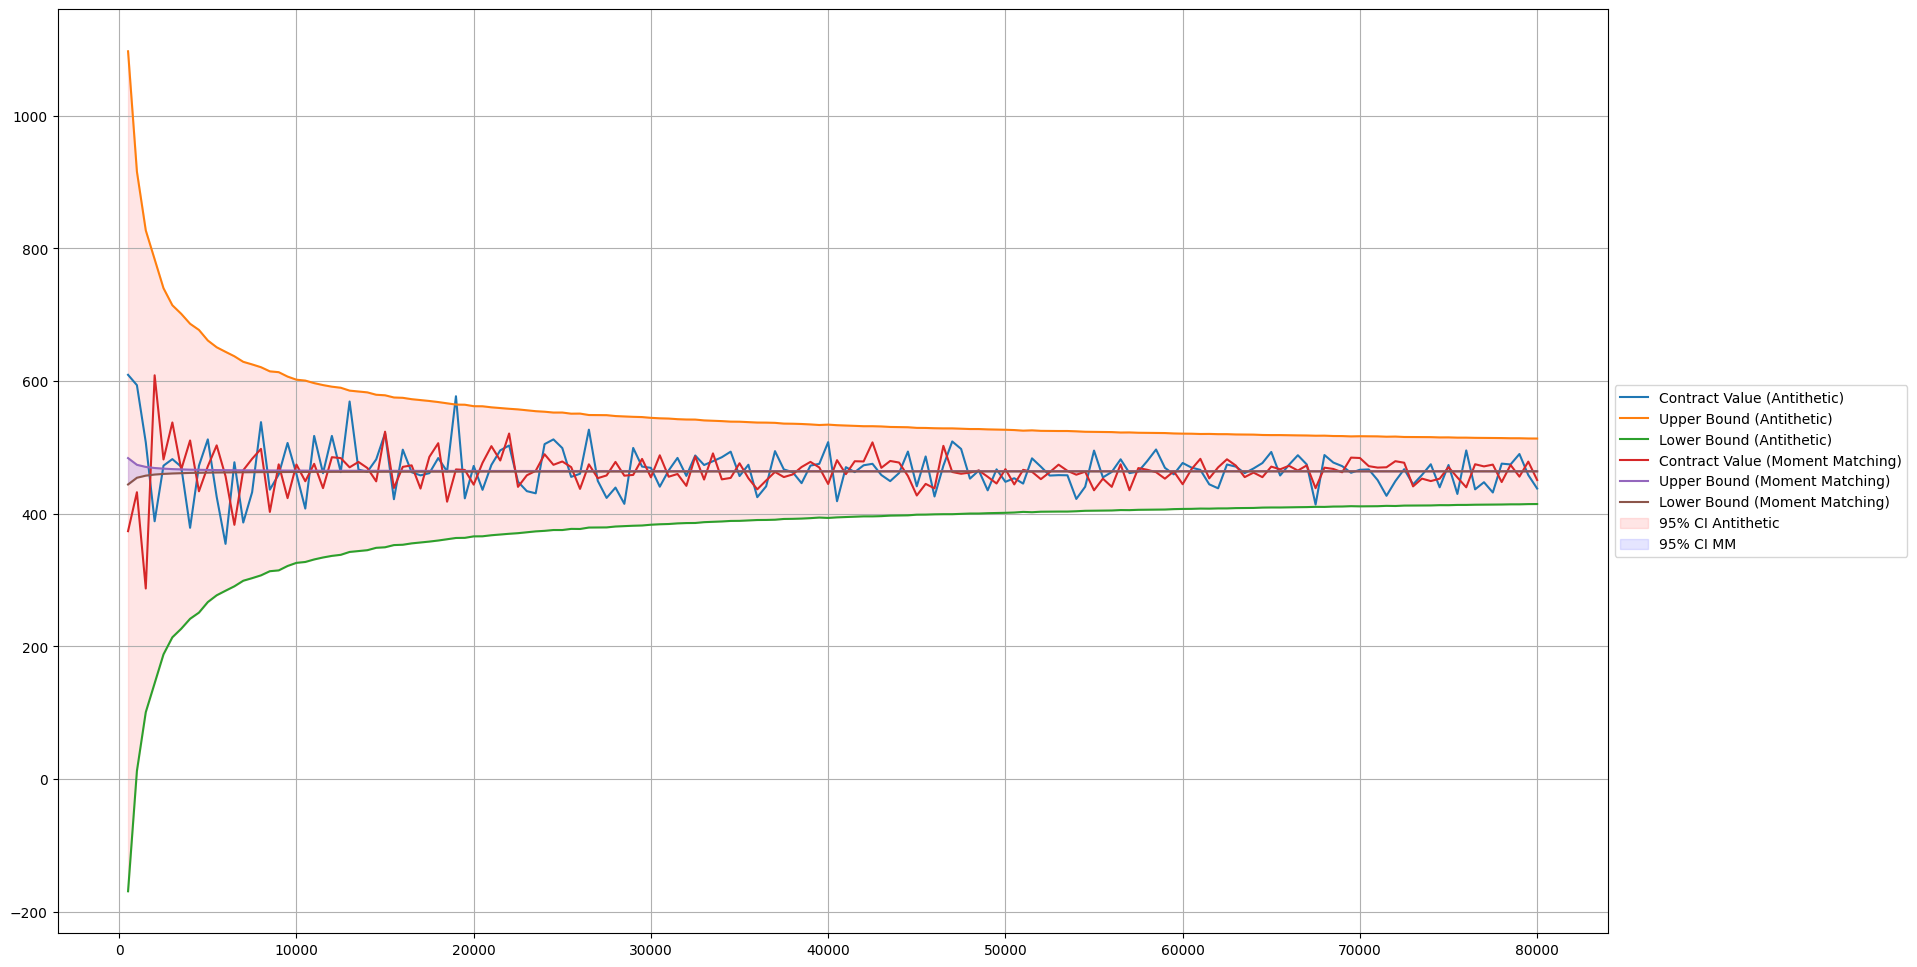

In [178]:
# Plot all contract values
plt.figure(figsize=(20, 12))

plt.plot(n_paths, antithetic_contract_values, label='Contract Value (Antithetic)')
plt.plot(n_paths, u_bound_antithetic, label='Upper Bound (Antithetic)')
plt.plot(n_paths, l_bound_antithetic, label='Lower Bound (Antithetic)')

plt.plot(n_paths, moment_matching_contract_values, label='Contract Value (Moment Matching)')
plt.plot(n_paths, u_bound_mm, label='Upper Bound (Moment Matching)')
plt.plot(n_paths, l_bound_mm, label='Lower Bound (Moment Matching)')

plt.fill_between(n_paths, l_bound_antithetic, u_bound_antithetic, color='red', alpha=0.1, label='95% CI Antithetic')
plt.fill_between(n_paths, l_bound_mm, u_bound_mm, color='blue', alpha=0.1, label='95% CI MM')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


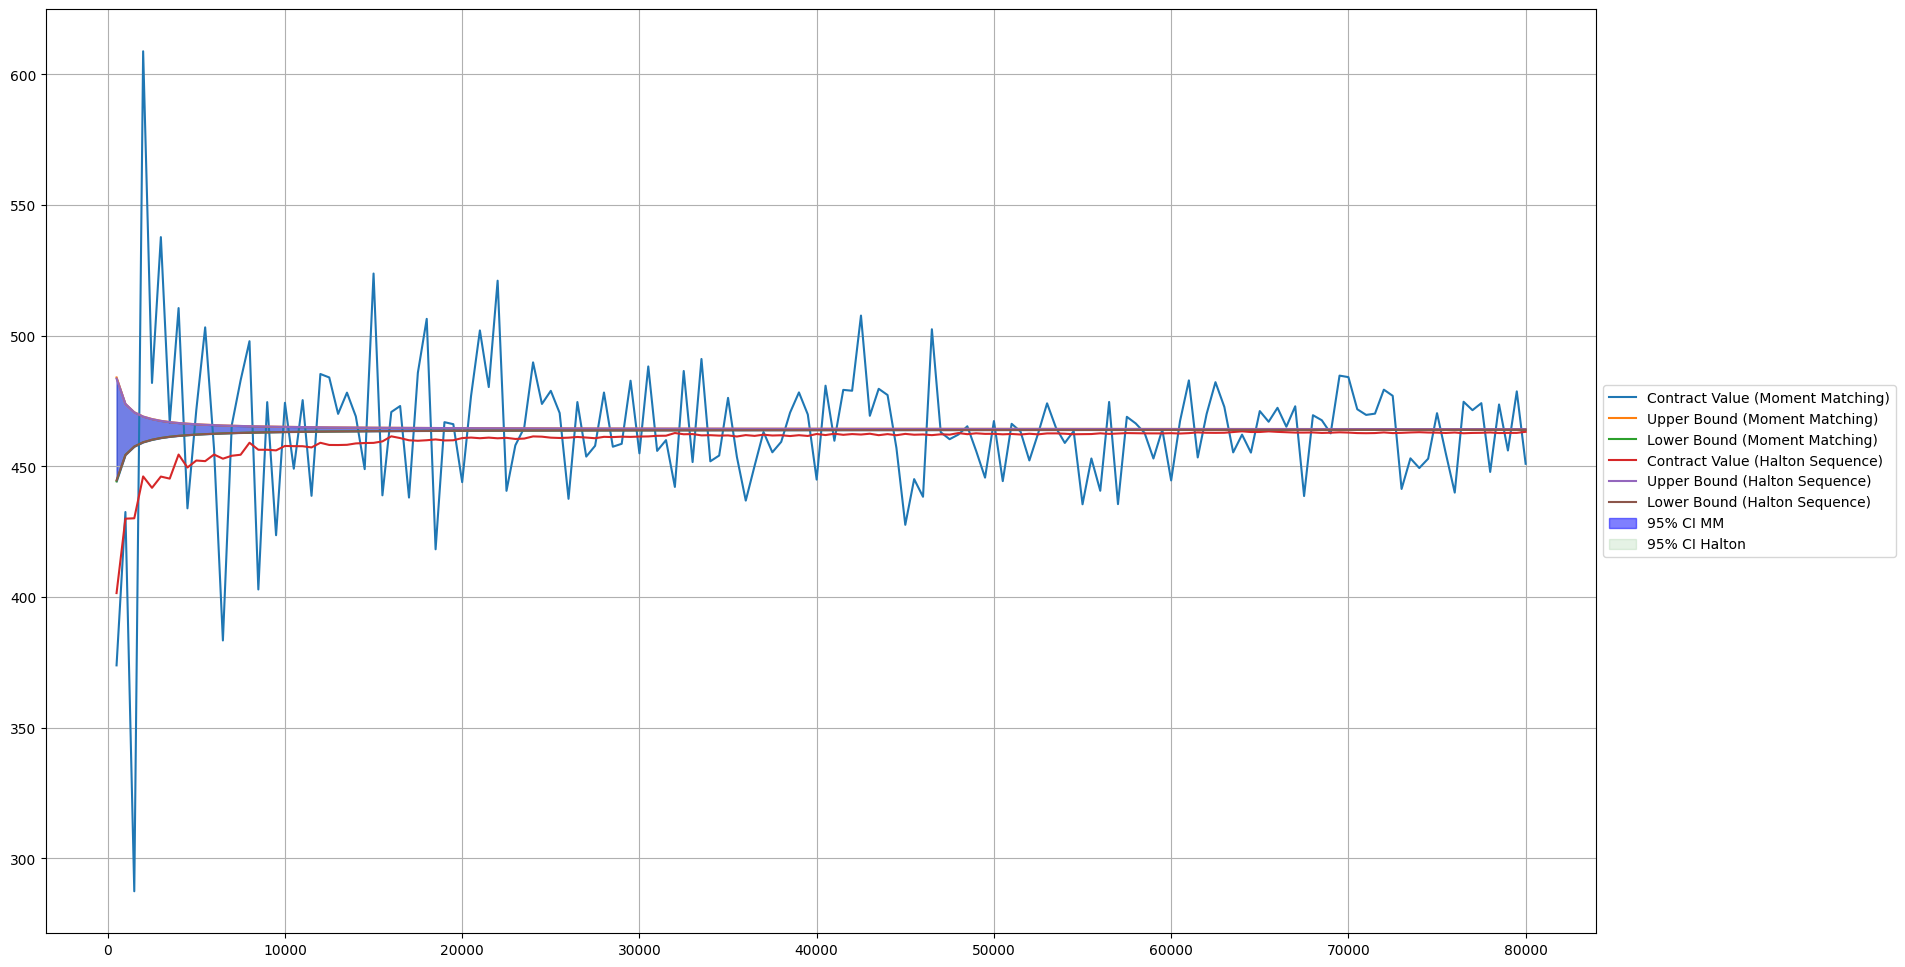

In [184]:
# Plot all contract values
plt.figure(figsize=(20, 12))

plt.plot(n_paths, moment_matching_contract_values, label='Contract Value (Moment Matching)')
plt.plot(n_paths, u_bound_mm, label='Upper Bound (Moment Matching)')
plt.plot(n_paths, l_bound_mm, label='Lower Bound (Moment Matching)')

plt.plot(n_paths, halton_contract_values, label='Contract Value (Halton Sequence)')
plt.plot(n_paths, u_bound_halton, label='Upper Bound (Halton Sequence)')
plt.plot(n_paths, l_bound_halton, label='Lower Bound (Halton Sequence)')

plt.fill_between(n_paths, l_bound_mm, u_bound_mm, color='blue', alpha=0.5, label='95% CI MM')
plt.fill_between(n_paths, l_bound_halton, u_bound_halton, color='green', alpha=0.1, label='95% CI Halton')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


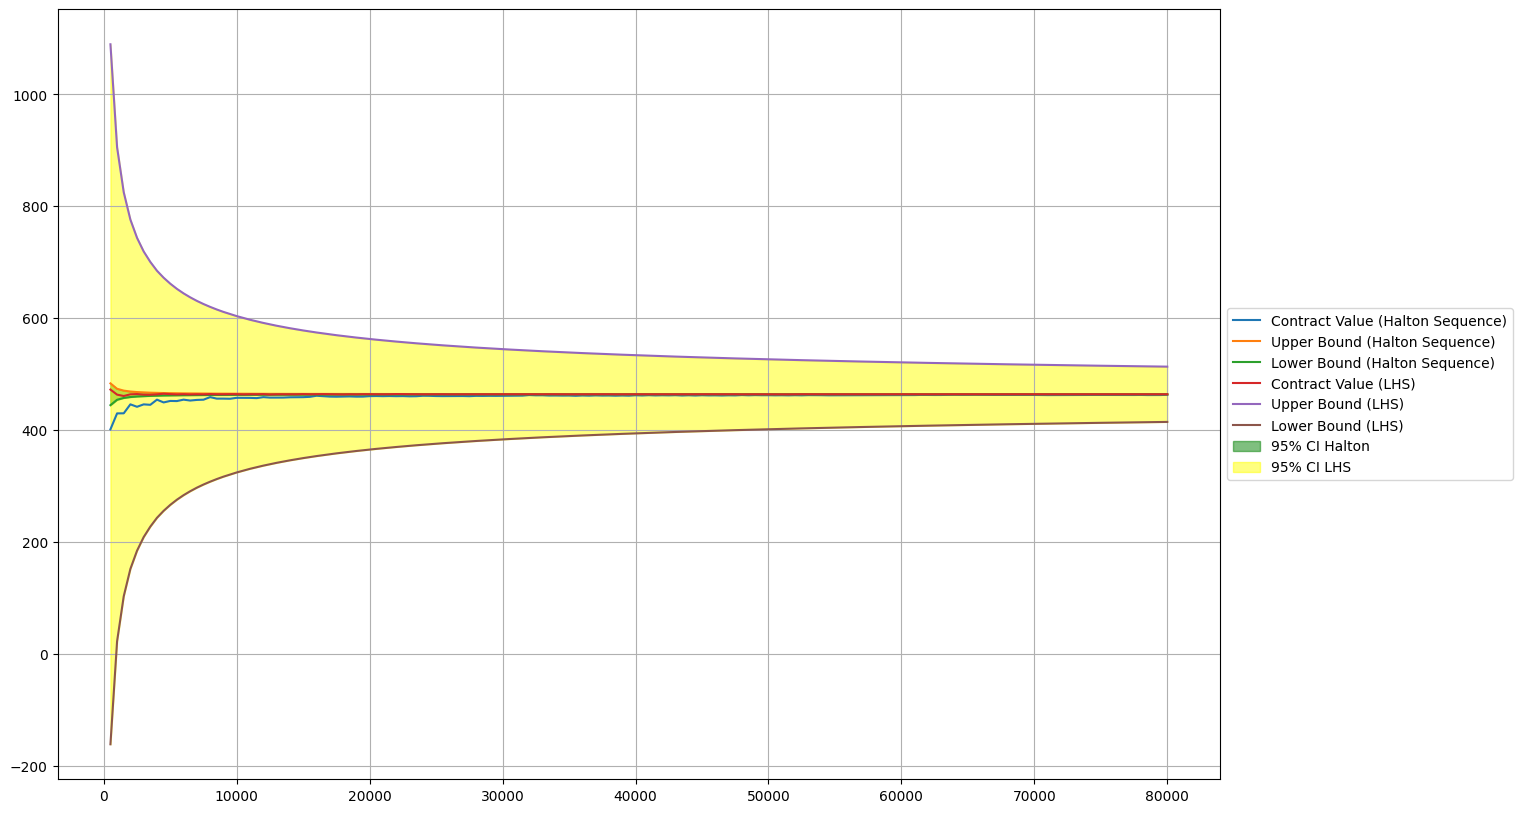

In [185]:
# Plot all contract values
plt.figure(figsize=(15, 10))

plt.plot(n_paths, halton_contract_values, label='Contract Value (Halton Sequence)')
plt.plot(n_paths, u_bound_halton, label='Upper Bound (Halton Sequence)')
plt.plot(n_paths, l_bound_halton, label='Lower Bound (Halton Sequence)')

plt.plot(n_paths, lhs_contract_values, label='Contract Value (LHS)')
plt.plot(n_paths, lhs_u_bound, label='Upper Bound (LHS)')
plt.plot(n_paths, lhs_l_bound, label='Lower Bound (LHS)')

plt.fill_between(n_paths, l_bound_halton, u_bound_halton, color='green', alpha=0.5, label='95% CI Halton')
plt.fill_between(n_paths, lhs_l_bound, lhs_u_bound, color='yellow', alpha=0.5, label='95% CI LHS')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()



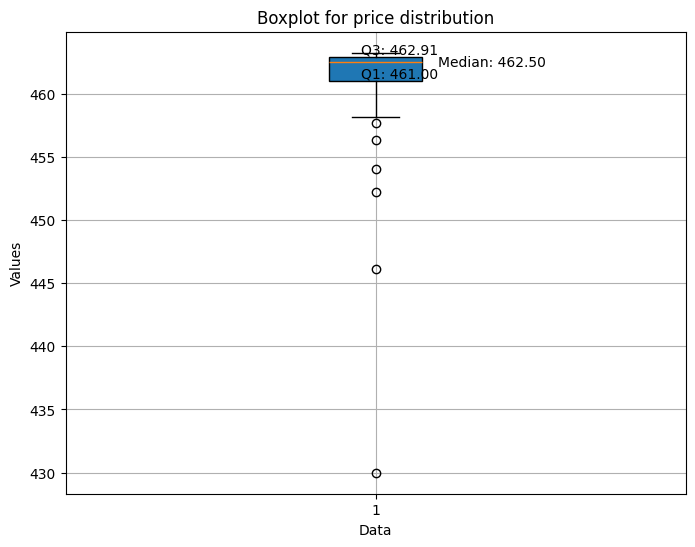

In [73]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(halton_contract_values, patch_artist=True, showfliers=True)

# Extract key values from the boxplot
medians = [median.get_ydata()[0] for median in box['medians']]
q1 = np.percentile(halton_contract_values, 25)
q3 = np.percentile(halton_contract_values, 75)
whiskers = [whisk.get_ydata() for whisk in box['whiskers']]
outliers = [outlier.get_ydata() for outlier in box['fliers']]

# Annotate key values
plt.text(1.1, medians[0], f'Median: {medians[0]:.2f}', verticalalignment='center', horizontalalignment='left', color='black')
plt.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='bottom', horizontalalignment='right', color='black')
plt.text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='bottom', horizontalalignment='right', color='black')
#for whisker in whiskers:
    #plt.text(1.1, whisker[0], f'Whisker: {whisker[0]:.2f}', verticalalignment='top', horizontalalignment='right', color='black')
    #plt.text(1.1, whisker[1], f'Whisker: {whisker[1]:.2f}', verticalalignment='top', horizontalalignment='right', color='black')
#for outlier in outliers:
    #plt.text(1.1, outlier[0], f'Outlier: {outlier[0]:.2f}', verticalalignment='top', horizontalalignment='right', color='black')

# Add labels and grid
plt.title('Boxplot for price distribution')
plt.xlabel('Data')
plt.ylabel('Values')
plt.grid(True)

plt.show()


Part 2 path dependent option

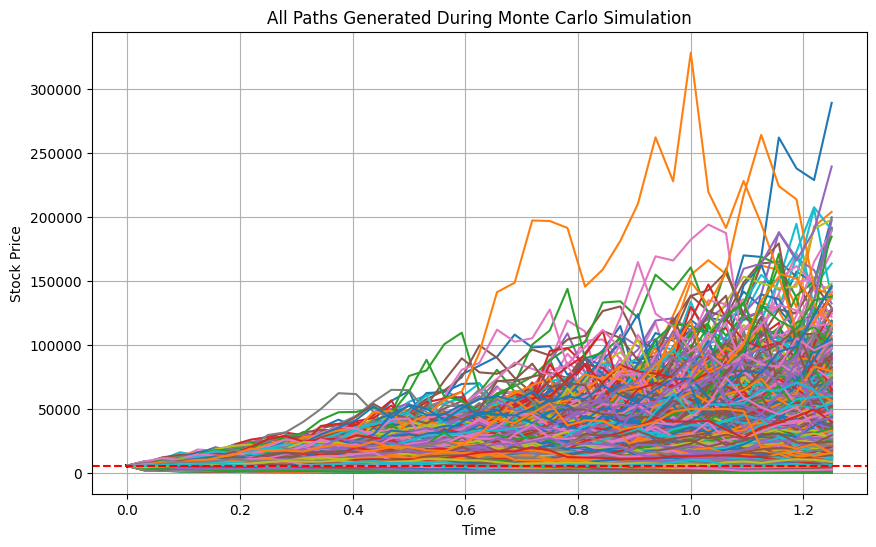

Option value using Monte Carlo simulation: 5099.147407230041


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW):
    return (alpha*theta - beta*S)*dt + sigma*np.abs(S)**gamma*dW

def max_fixed_strike_lookback_call_option(S, X):
    return max(S - X, 0)

def monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n):
    dt = T / K
    option_values = []
    all_paths = []
    for _ in range(n):
        S = S0
        max_S = S
        path = [S]
        for _ in range(K):
            dW = np.random.normal(0, np.sqrt(dt))
            S += risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW)
            max_S = max(max_S, S)
            path.append(S)
        all_paths.append(path)
        option_value = max_fixed_strike_lookback_call_option(max_S, X) * np.exp(-r * T)
        option_values.append(option_value)
    return np.mean(option_values), all_paths

# Given parameters
S0 = 5513.2
alpha = 0.04
beta = 0.04
theta = 5510
sigma = 0.37
gamma = 1.1
T = 1.25
K = 40
X = 5500
r = 0.01
n = 100000

# Monte Carlo simulation
option_value, all_paths = monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n)

# Plot all paths
plt.figure(figsize=(10, 6))
for path in all_paths:
    plt.plot(np.linspace(0, T, K+1), path)
plt.axhline(y=5100, color='red', linestyle='--', label='Analytical solution')
plt.title('All Paths Generated During Monte Carlo Simulation')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

print(f"Option value using Monte Carlo simulation: {option_value}")


With different values of n

NameError: name 'n_paths' is not defined

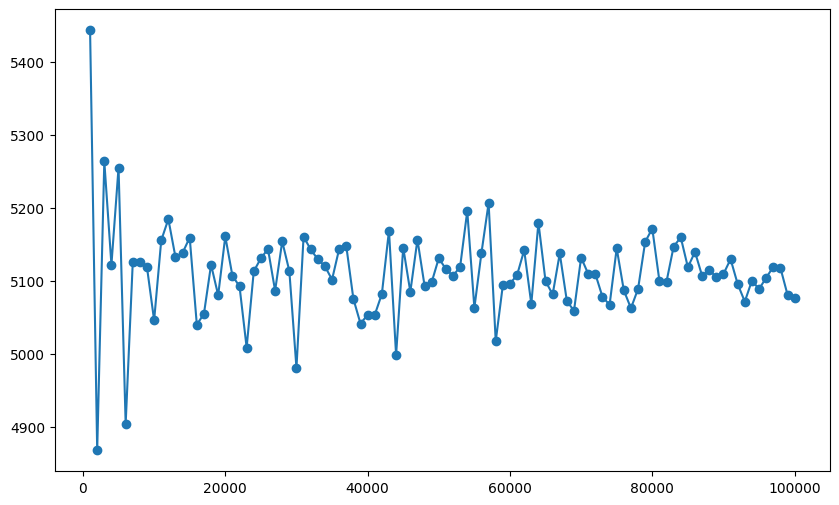

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW):
    return (alpha*theta - beta*S)*dt + sigma*np.abs(S)**gamma*dW

def max_fixed_strike_lookback_call_option(S, X):
    return max(S - X, 0)

def monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n):
    dt = T / K
    option_values = []
    all_paths = []
    for _ in range(n):
        S = S0
        max_S = S
        path = [S]
        for _ in range(K):
            dW = np.random.normal(0, np.sqrt(dt))
            S += risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW)
            max_S = max(max_S, S)
            path.append(S)
        all_paths.append(path)
        option_value = max_fixed_strike_lookback_call_option(max_S, X) * np.exp(-r * T)
        option_values.append(option_value)
    return np.mean(option_values), all_paths,np.std(option_values)

# Given parameters
S0 = 5513.2
alpha = 0.04
beta = 0.04
theta = 5510
sigma = 0.37
gamma = 1.1
T = 1.25
K = 40
X = 5500
r = 0.01
n_values = list(range(1000, 100001, 1000)) # Different values of n for convergence investigation

# Lists to store option values for different values of n
option_values_list = []
pathdep_l_bound=[]
pathdep_u_bound=[]
# Perform Monte Carlo simulations for different values of n
for n in n_values:
    option_value, _ ,option_value_std= monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n)
    std_error_pathdep = option_value_std / np.sqrt(n)
    margin_of_error_pathdep = 1.96 * std_error_pathdep
    upper_bound_pathdep = 5100 + margin_of_error_pathdep
    lower_bound_pathdep = 5100 - margin_of_error_pathdep
    
    # Append the contract value and bounds to lists for LHS
    pathdep_l_bound.append(lower_bound_pathdep)
    pathdep_u_bound.append(upper_bound_pathdep)
    option_values_list.append(option_value)

# Plot convergence of option values with respect to n
plt.figure(figsize=(10, 6))
plt.plot(n_values, option_values_list, marker='o', linestyle='-')
plt.plot(n_values, pathdep_u_bound, label='Upper Bound (path dependant)')
plt.plot(n_values, pathdep_l_bound, label='Lower Bound (path dependant)')
plt.title('Convergence of Path-Dependent Option Value with Respect to Number of Paths (n)')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Option Value')
plt.axhline(y=5100, color='red', linestyle='--', label='REFERENCE VALUE')
plt.fill_between(n_values, pathdep_l_bound, pathdep_u_bound, color='gray', alpha=0.2, label='95% CI')
plt.show()


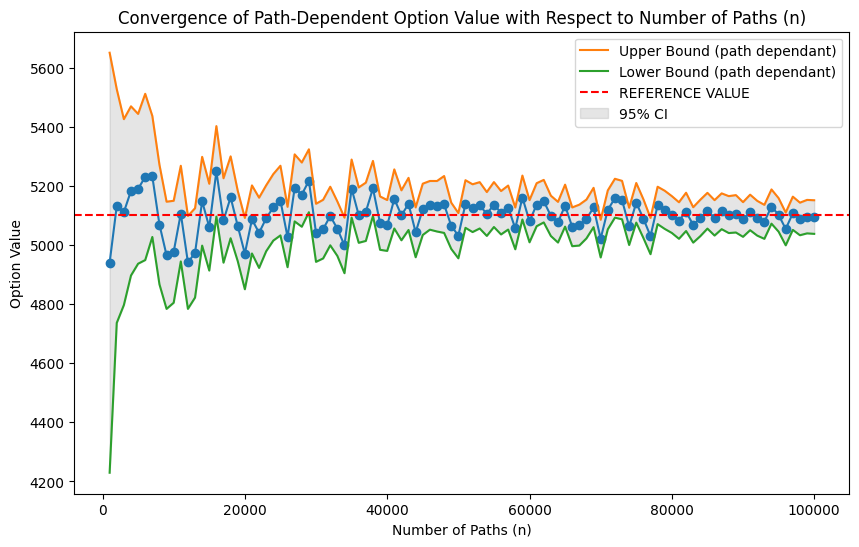

In [20]:
# Plot convergence of option values with respect to n
plt.figure(figsize=(10, 6))
plt.plot(n_values, option_values_list, marker='o', linestyle='-')
plt.plot(n_values, pathdep_u_bound, label='Upper Bound (path dependant)')
plt.plot(n_values, pathdep_l_bound, label='Lower Bound (path dependant)')
plt.title('Convergence of Path-Dependent Option Value with Respect to Number of Paths (n)')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Option Value')
plt.axhline(y=5100, color='red', linestyle='--', label='REFERENCE VALUE')
plt.fill_between(n_values, pathdep_l_bound, pathdep_u_bound, color='gray', alpha=0.2, label='95% CI')
plt.legend()
plt.show()



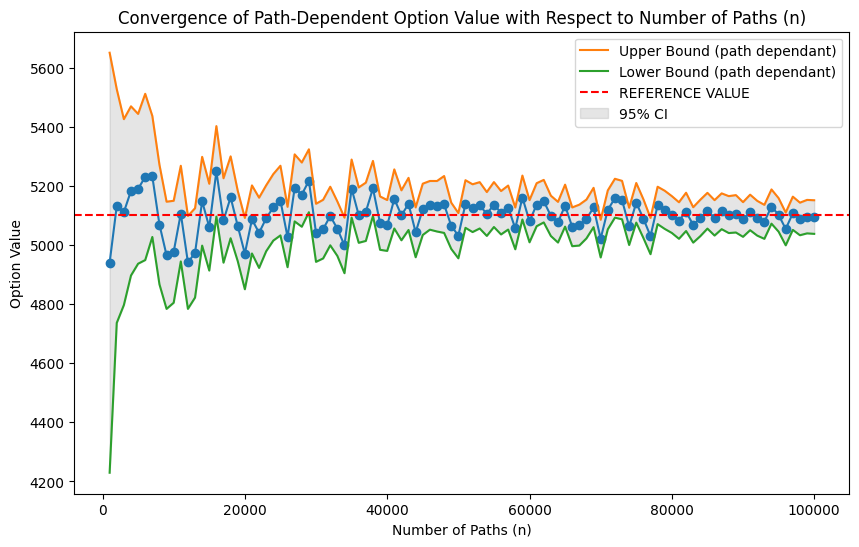

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats.qmc import LatinHypercube as lhs

def risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW):
    return (alpha*theta - beta*S)*dt + sigma*np.abs(S)**gamma*dW

def max_fixed_strike_lookback_call_option(S, X):
    return max(S - X, 0)

def generate_normal_random():
    u1 = np.random.rand()
    u2 = np.random.rand()
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    return z1

# Modify monte_carlo_simulation function to use moment matching
def monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n):
    dt = T / K
    option_values = []
    all_paths = []
    for _ in range(n):
        S = S0
        max_S = S
        path = [S]
        for _ in range(K):
            dW = generate_normal_random() * np.sqrt(dt)
            S += risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW)
            max_S = max(max_S, S)
            path.append(S)
        all_paths.append(path)
        option_value = max_fixed_strike_lookback_call_option(max_S, X) * np.exp(-r * T)
        option_values.append(option_value)
    return np.mean(option_values), all_paths, np.std(option_values)

# Given parameters
S0 = 5513.2
alpha = 0.04
beta = 0.04
theta = 5510
sigma = 0.37
gamma = 1.1
T = 1.25
K = 40
X = 5500
r = 0.01
n_values = list(range(1000, 100001, 1000)) # Different values of n for convergence investigation

# Lists to store option values for different values of n
option_values_list = []
pathdep_l_bound=[]
pathdep_u_bound=[]
# Perform Monte Carlo simulations for different values of n
for n in n_values:
    option_value, _, option_value_std = monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n)
    std_error_pathdep = option_value_std / np.sqrt(n)
    margin_of_error_pathdep = 1.96 * std_error_pathdep
    upper_bound_pathdep = option_value + margin_of_error_pathdep
    lower_bound_pathdep = option_value - margin_of_error_pathdep
    
    # Append the contract value and bounds to lists for LHS
    pathdep_l_bound.append(lower_bound_pathdep)
    pathdep_u_bound.append(upper_bound_pathdep)
    option_values_list.append(option_value)

# Plot convergence of option values with respect to n
plt.figure(figsize=(10, 6))
plt.plot(n_values, option_values_list, marker='o', linestyle='-')
plt.plot(n_values, pathdep_u_bound, label='Upper Bound (path dependant)')
plt.plot(n_values, pathdep_l_bound, label='Lower Bound (path dependant)')
plt.title('Convergence of Path-Dependent Option Value with Respect to Number of Paths (n)')
plt.xlabel('Number of Paths (n)')
plt.ylabel('Option Value')
plt.axhline(y=5100, color='red', linestyle='--', label='REFERENCE VALUE')
plt.fill_between(n_values, pathdep_l_bound, pathdep_u_bound, color='gray', alpha=0.2, label='95% CI')
plt.legend()
plt.show()


In [19]:
print(option_values_list[-1])

5094.2036519937565


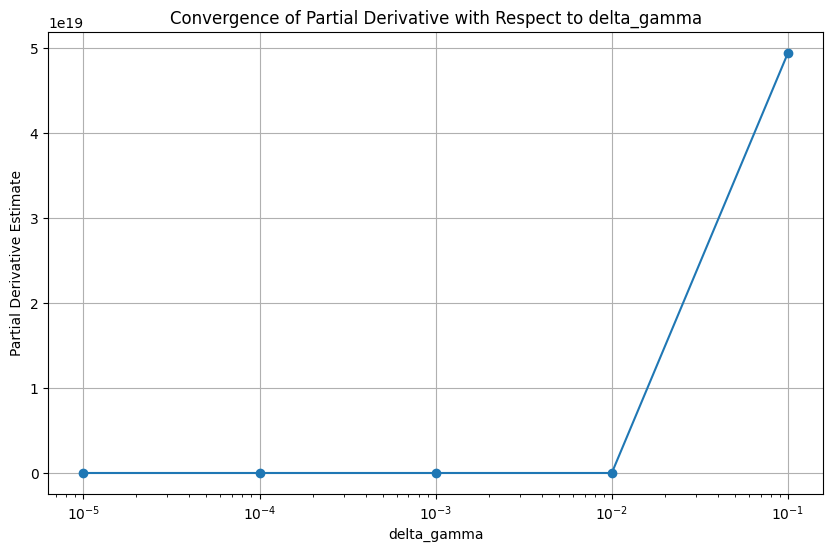

Estimated partial derivative: 4.940676379643876e+19


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the partial derivative using finite difference method
def compute_partial_derivative(gamma, delta_gamma):
    V1 = monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n)[0]  # Access option value from tuple
    V2 = monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma + delta_gamma, T, K, X, r, n)[0]  # Access option value from tuple
    partial_derivative = (V2 - V1) / delta_gamma
    return partial_derivative

# Given parameters (excluding gamma, which will be varied for the derivative calculation)
S0 = 5513.2
alpha = 0.04
beta = 0.04
theta = 5510
sigma = 0.37
T = 1.25
K = 40
X = 5500
r = 0.01
n = 10000  # Number of paths for Monte Carlo simulations

# Values of delta_gamma to explore for convergence
delta_gamma_values = np.logspace(-5, -1, 5)

# Lists to store partial derivative estimates and errors (optional for analysis)
partial_derivative_estimates = []
errors = []

# Calculate partial derivative for different delta_gamma values
for delta_gamma in delta_gamma_values:
    partial_derivative = compute_partial_derivative(gamma=1.1, delta_gamma=delta_gamma)
    partial_derivative_estimates.append(partial_derivative)

    # Optional: Estimate error using a finer delta_gamma (if computationally feasible)
    error = abs(partial_derivative - compute_partial_derivative(gamma=1.1, delta_gamma=delta_gamma / 10))
    errors.append(error)

# Plot convergence of partial derivative estimates with respect to delta_gamma
plt.figure(figsize=(10, 6))
plt.plot(delta_gamma_values, partial_derivative_estimates, marker='o', linestyle='-')
plt.xscale('log')  # Using a log scale for better visualization
plt.title('Convergence of Partial Derivative with Respect to delta_gamma')
plt.xlabel('delta_gamma')
plt.ylabel('Partial Derivative Estimate')
plt.grid(True)
plt.show()

# Choose the most accurate estimate based on convergence analysis
best_estimate = partial_derivative_estimates[-1]  # Assuming convergence to the last value
print("Estimated partial derivative:", best_estimate)


In [ ]:
(αθ − βS)dt + σ(|S|)γ dW

In [ ]:
X=100
k=10
path=np.zeros(k)
path[0]=S0
combined_paths=[]
payoff=[]
dt=1.25/k
def lookback_option():
    for i in range(0,n):
        for j in range(0,k):
            dW = np.random.normal(0, np.sqrt(dt))
            path[j+1]=path[j]+((alpha*theta)-(beta*path[j]))+(alpha*np.abs(path[j])*gamma*dW)
        combined_paths.append(path)
        payoff.append(max(max(path)-X,0))
    contractval=np.mean(payoff)    
            



In [70]:
import numpy as np
import matplotlib.pyplot as plt

def risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW):
    return (alpha*theta - beta*S)*dt + sigma*np.abs(S)**gamma*dW

def max_fixed_strike_lookback_call_option(S, X):
    return max(S - X, 0)

def monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n):
    dt = T / K
    payoffs = np.zeros(n)
    for i in range(n):
        S = S0
        max_S = S
        for _ in range(K):
            dW = np.random.normal(0, np.sqrt(dt))
            S += risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW)
            max_S = max(max_S, S)
        payoff = max_fixed_strike_lookback_call_option(max_S, X) * np.exp(-r * T)
        payoffs[i] = payoff
    return np.mean(payoffs)

def estimate_partial_derivative(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n, delta_gamma):
    V_gamma = monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n)
    V_gamma_plus = monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma + delta_gamma, T, K, X, r, n)
    partial_derivative = (V_gamma_plus - V_gamma) / delta_gamma
    return partial_derivative

# Set parameters
n_values = list(range(1000, 100001, 1000))  # Explore different N values
delta_gamma_values = np.logspace(-7, -5, 30)  # Explore different delta_gamma values

# Perform simulations and estimate derivatives
partial_derivative_estimates = []
errors = []  # Optional: Estimate errors for convergence analysis
for delta_gamma in delta_gamma_values:
    partial_derivative = estimate_partial_derivative(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n_values[0], delta_gamma)
    partial_derivative_estimates.append(partial_derivative)

[1.00000000e-07 1.17210230e-07 1.37382380e-07 1.61026203e-07
 1.88739182e-07 2.21221629e-07 2.59294380e-07 3.03919538e-07
 3.56224789e-07 4.17531894e-07 4.89390092e-07 5.73615251e-07
 6.72335754e-07 7.88046282e-07 9.23670857e-07 1.08263673e-06
 1.26896100e-06 1.48735211e-06 1.74332882e-06 2.04335972e-06
 2.39502662e-06 2.80721620e-06 3.29034456e-06 3.85662042e-06
 4.52035366e-06 5.29831691e-06 6.21016942e-06 7.27895384e-06
 8.53167852e-06 1.00000000e-05]


Text(0, 0.5, 'Aprroximate Partial Derivative')

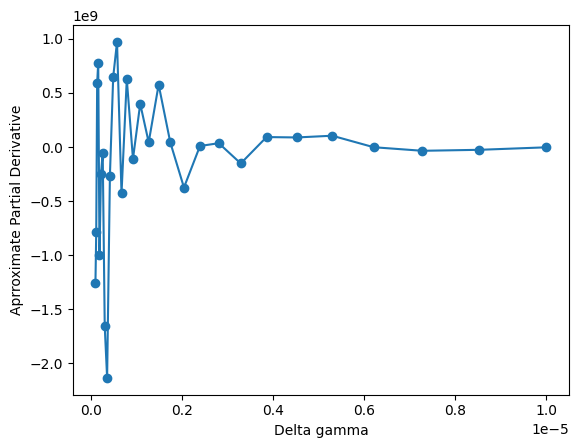

In [72]:
partial_derivative_estimates

print(delta_gamma_values)
plt.plot(delta_gamma_values,partial_derivative_estimates,marker='o')
plt.xlabel('Delta gamma')
plt.ylabel('Aprroximate Partial')

In [116]:
import numpy as np
import matplotlib.pyplot as plt

def risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW):
    return (alpha*theta - beta*S)*dt + sigma*np.abs(S)**gamma*dW

def max_fixed_strike_lookback_call_option(S, X):
    return max(S - X, 0)

def monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n):
    dt = T / K
    payoffs = np.zeros(n)
    for i in range(n):
        S = S0
        max_S = S
        for _ in range(K):
            dW = np.random.normal(0, np.sqrt(dt))
            S += risk_neutral_process(S, alpha, beta, theta, sigma, gamma, dt, dW)
            max_S = max(max_S, S)
        payoff = max_fixed_strike_lookback_call_option(max_S, X) * np.exp(-r * T)
        payoffs[i] = payoff
    return np.mean(payoffs)

def estimate_partial_derivative(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n, delta_gamma):
    V_gamma = monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n)
    V_gamma_plus = monte_carlo_simulation(S0, alpha, beta, theta, sigma, gamma + delta_gamma, T, K, X, r, n)
    partial_derivative = (V_gamma_plus - V_gamma) / delta_gamma
    return partial_derivative

# Set parameters
n_values = list(range(1000, 10001, 1000))  # Explore different N values
delta_gamma_values = np.logspace(-7, -1, 30)  # Explore different delta_gamma values

# Perform simulations and estimate derivatives
partial_derivative_estimates = []
errors = []  # Optional: Estimate errors for convergence analysis
for n in n_values:
    n_approx=[]
    for delta_gamma in delta_gamma_values:
        partial_derivative = estimate_partial_derivative(S0, alpha, beta, theta, sigma, gamma, T, K, X, r, n, delta_gamma)
        n_approx.append(partial_derivative)
    partial_derivative_estimates.append(n_approx)

In [120]:
# Find the index of the best N value (highest number of simulations)
best_n_index = np.argmax(n_values)
best_derivative_estimate = partial_derivative_estimates[best_n_index]

# Calculate MSE for each delta_gamma value relative to the derivative estimate obtained with the best N value
MSEs = np.zeros(len(delta_gamma_values))
for i, delta_gamma in enumerate(delta_gamma_values):
    errors = [(partial_derivative_estimates[j][i] - best_derivative_estimate)**2 for j in range(len(n_values))]  # Use the derivative estimate obtained with the best N value
    MSEs[i] = np.mean(errors)

# Find the index of the minimum MSE
best_index = np.argmin(MSEs)
best_delta_gamma = delta_gamma_values[best_index]
best_MSE = MSEs[best_index]
best_derivative_estimate = partial_derivative_estimates[best_n_index][best_index]

print("Best Delta Gamma:", best_delta_gamma)
print("Best MSE:", best_MSE)
print("Best Derivative Estimate:", best_derivative_estimate)



Best Delta Gamma: 1e-07
Best MSE: 3.170681390256437e+80
Best Derivative Estimate: -1863589529.8646939


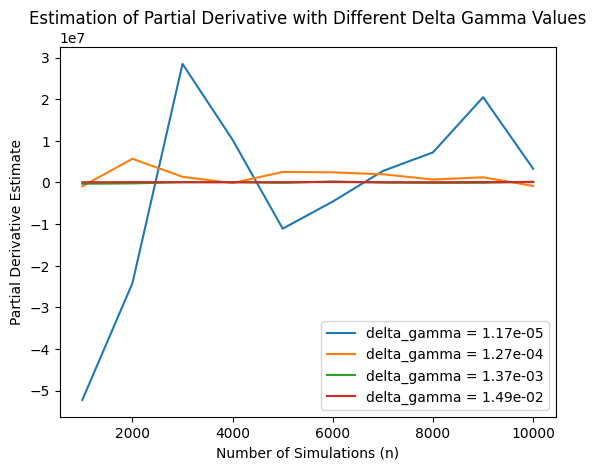

In [117]:
# Assuming partial_derivative_estimates is a numpy array of shape (len(n_values), len(delta_gamma_values))
array = np.array(partial_derivative_estimates)
tarray = array.T

# Extract the required delta_gamma values
selected_delta_gamma_indices = [10, 15, 20, 25]  # Indices of delta_gamma values you want to plot
selected_tnewarray = tarray[selected_delta_gamma_indices]

# Plot the lines
for i, delta_gamma_index in enumerate(selected_delta_gamma_indices):
    delta_gamma = delta_gamma_values[delta_gamma_index]
    plt.plot(n_values, selected_tnewarray[i], label=f'delta_gamma = {delta_gamma:.2e}')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Number of Simulations (n)')
plt.ylabel('Partial Derivative Estimate')
plt.title('Estimation of Partial Derivative with Different Delta Gamma Values')

# Show the plot
plt.show()


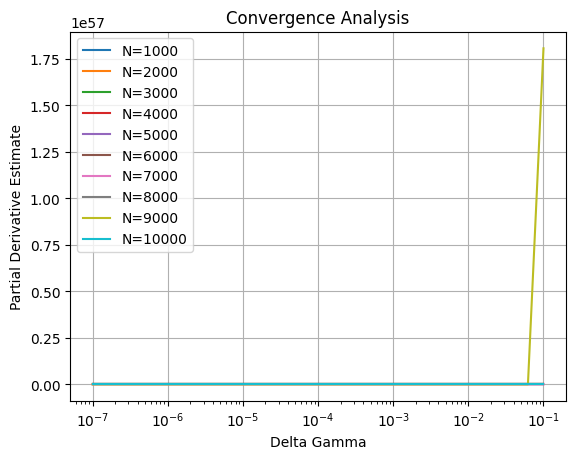

ValueError: x and y must have same first dimension, but have shapes (29,) and (9,)

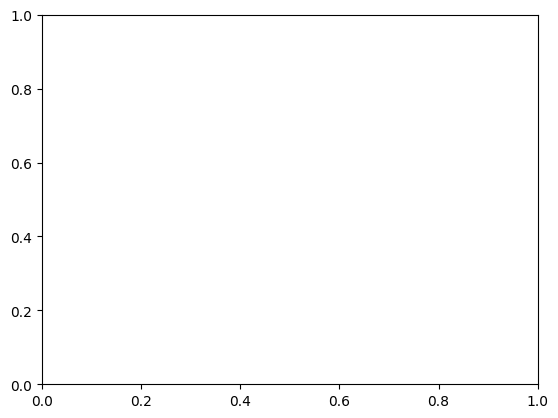

In [118]:
# Perform convergence analysis
for i, n in enumerate(n_values):
    plt.plot(delta_gamma_values, partial_derivative_estimates[i], label=f'N={n}')

plt.xscale('log')
plt.xlabel('Delta Gamma')
plt.ylabel('Partial Derivative Estimate')
plt.title('Convergence Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Perform error analysis
# Calculate errors between successive estimates for each delta_gamma value
errors = np.abs(np.diff(partial_derivative_estimates, axis=0))
average_errors = np.mean(errors, axis=1)

# Plot average errors against delta_gamma values
plt.plot(delta_gamma_values[:-1], average_errors)
plt.xscale('log')
plt.xlabel('Delta Gamma')
plt.ylabel('Average Error')
plt.title('Error Analysis')
plt.grid(True)
plt.show()
